# Bayesian Bandits - Interactive Demo

**DS-122: Bayesian Testing & Decision Making**

This notebook contains the interactive multi-armed bandit demo for live classroom interaction.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
from ipywidgets import Button, HBox, VBox, Output
from IPython.display import display, clear_output

## Define Helper Functions

In [2]:
def update(distribution, likelihood):
    '''Standard Bayesian update function'''
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

def update_bandit(belief, outcome):
    '''Update belief about a machine based on win/loss outcome'''
    if outcome == 'W':
        update(belief, belief.index)
    elif outcome == 'L':
        update(belief, 1 - belief.index)

## Initialize the Bandits

We have 4 slot machines, each with an unknown probability of winning.

In [4]:
# Create uniform prior
p_prior = pd.DataFrame(index=np.arange(101)/100)
p_prior['probs'] = 1/101

# Initialize beliefs for 4 machines
beliefs = [p_prior.copy() for i in range(4)]
play_history = []

# True probabilities (hidden from us!)
actual_probs = [0.50, 0.20, 0.30, 0.10]

print("✅ 4 machines initialized with uniform priors")
print("🎰 Ready to play!")

✅ 4 machines initialized with uniform priors
🎰 Ready to play!


## Visualization Functions

In [5]:
def show_beliefs():
    '''Display current beliefs for all 4 machines'''
    fig, axes = plt.subplots(1, 4, figsize=(14, 3))
    for i, pmf in enumerate(beliefs):
        pmf.plot(ax=axes[i], lw=3, legend=False, color='blue')
        mean_p = np.sum(pmf.index * pmf['probs'])
        axes[i].set_title(f'Machine {i} (mean={mean_p:.2f})', size=12)
        axes[i].set_xlabel('Win Probability (p)', size=10)
        axes[i].set_ylabel('Probability', size=10)
    plt.tight_layout()
    plt.show()

def play_machine(machine_num):
    '''Play a specific machine and update beliefs'''
    # Play the machine
    p = actual_probs[machine_num]
    outcome = 'W' if np.random.random() < p else 'L'
    
    # Update belief
    update_bandit(beliefs[machine_num], outcome)
    
    # Record history
    play_history.append((machine_num, outcome))
    
    # Show result
    print(f"\n{'='*60}")
    print(f"🎰 Played Machine {machine_num}: {outcome}!")
    wins = len([h for h in play_history if h[0]==machine_num and h[1]=='W'])
    plays = len([h for h in play_history if h[0]==machine_num])
    print(f"   History: {plays} plays, {wins} wins ({wins/plays*100:.1f}%)")
    print(f"{'='*60}\n")
    
    # Show updated beliefs
    show_beliefs()

def show_summary():
    '''Show summary of all plays'''
    print("\n" + "="*60)
    print("SUMMARY OF ALL PLAYS")
    print("="*60)
    for i in range(4):
        plays = len([h for h in play_history if h[0]==i])
        wins = len([h for h in play_history if h[0]==i and h[1]=='W'])
        win_rate = wins/plays*100 if plays > 0 else 0
        print(f"Machine {i}: {plays:2d} plays, {wins:2d} wins ({win_rate:5.1f}%) | True p = {actual_probs[i]:.2f}")
    print("="*60 + "\n")

## Current State - Before We Start

All machines start with uniform beliefs (we know nothing about them).

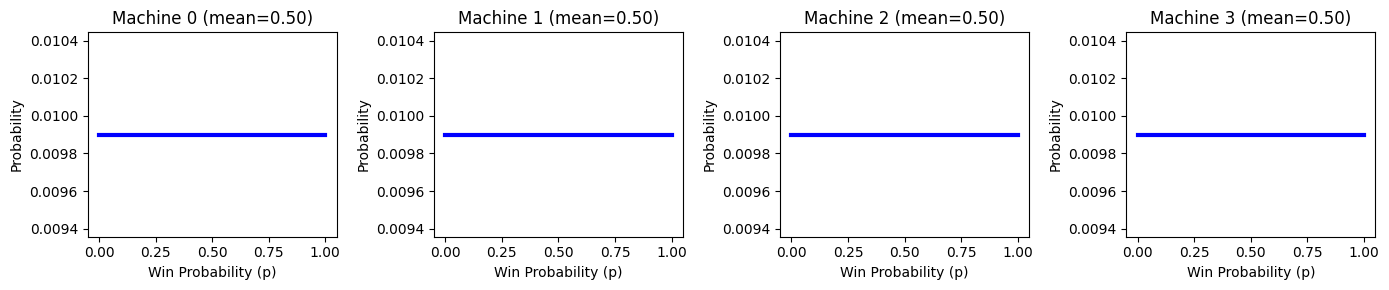

In [10]:
show_beliefs()

---

## 🎮 LET'S PLAY!

### Instructions:
**Click a button below to play that machine!**

The beliefs will update automatically after each play.

---

In [11]:
# Create output widget for displaying results
output = Output()

# Create buttons for each machine
buttons = []
for i in range(4):
    btn = Button(
        description=f'Machine {i}',
        button_style='info',
        tooltip=f'Play machine {i}',
        layout={'width': '120px', 'height': '50px'}
    )
    buttons.append(btn)

def on_button_click(machine_num):
    '''Handler for button clicks'''
    def handler(b):
        with output:
            clear_output(wait=True)
            play_machine(machine_num)
    return handler

# Attach click handlers
for i, btn in enumerate(buttons):
    btn.on_click(on_button_click(i))

# Display buttons
display(HBox(buttons))
display(output)

Output()

In [12]:
show_summary()


SUMMARY OF ALL PLAYS
Machine 0: 10 plays,  5 wins ( 50.0%) | True p = 0.50
Machine 1:  7 plays,  2 wins ( 28.6%) | True p = 0.20
Machine 2:  6 plays,  1 wins ( 16.7%) | True p = 0.30
Machine 3:  9 plays,  1 wins ( 11.1%) | True p = 0.10



## Reset (if needed)

Run this cell to reset and start over:

✅ Reset complete! Ready to play again.


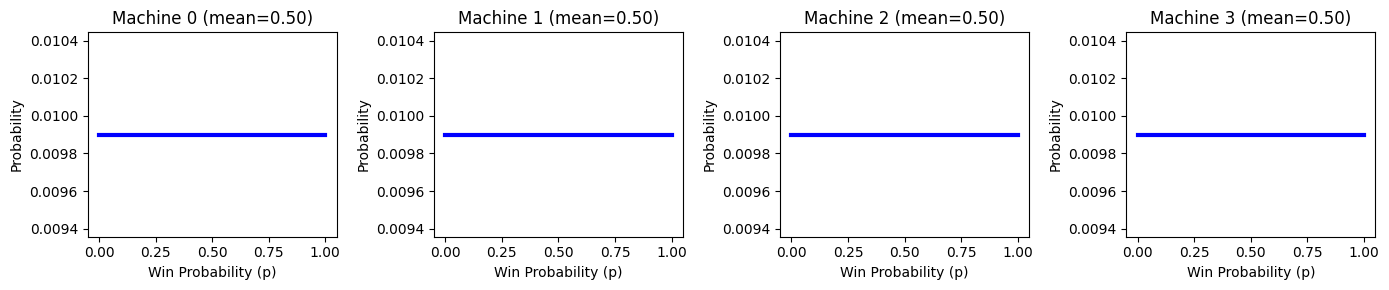

In [9]:
# Reset everything
beliefs = [p_prior.copy() for i in range(4)]
play_history = []
print("✅ Reset complete! Ready to play again.")
show_beliefs()